# Face Detection with Python using OpenCV

This tutorial will introduce you to the concept of object detection in Python using OpenCV library and how you can utilize it to perform tasks like Facial detection.

## OpenCV for Face Detection Tutorial

In this section, we will learn to apply a popular face detection approach called Haar Cascade for face detection using OpenCV and Python.

### Intro to Haar Cascade Classifiers

This method was first introduced in the paper [Rapid Object Detection Using a Boosted Cascade of Simple Features](https://www.researchgate.net/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features), written by Paul Viola and Michael Jones.

The idea behind this technique involves using a cascade of classifiers to detect different features in an image. These classifiers are then combined into one strong classifier that can accurately distinguish between samples that contain a human face from those that don’t.

The Haar Cascade classifier that is built into OpenCV has already been trained on a large dataset of human faces, so no further training is required. We just need to load the classifier from the library and use it to perform face detection on an input image.

### Installing OpenCV for Python

To install the OpenCV library, simply open your command prompt or terminal window and run the following command:

In [1]:
!pip install opencv-python

This command will only work if you already have pip installed on your device. If you’d like to learn more about the pip package manager, you can read our [PIP Python Tutorial](https://www.datacamp.com/tutorial/pip-python-package-manager).

### OpenCV for Face Detection in Images

We will build a detector to identify the human face in a [photo](https://unsplash.com/photos/rpF3p_RrE9g) from Unsplash. Make sure to save the picture to your working directory and rename it to `input_image` before coding along.

#### Step 1: Import the OpenCV Package

Now, let’s import OpenCV and enter the input image path with the following lines of code:

In [2]:
import cv2

imagePath = 'input_image.jpg'

#### Step 2: Read the Image

Then, we need to read the image with OpenCV’s imread() function:

In [3]:
img = cv2.imread(imagePath)

This will load the image from the specified file path and return it in the form of a Numpy array. 

Let’s print the dimensions of this array:

In [4]:
img.shape

(750, 1422, 3)

Notice that this is a 3-dimensional array. The array’s values represent the picture’s height, width, and channels respectively. Since this is a color image, there are three channels used to depict it - blue, green, and red (BGR). 

Note that while the conventional sequence used to represent images is RGB (Red, Blue, Green), the OpenCV library uses the opposite layout (Blue, Green, Red).

#### Step 3: Convert the Image to Grayscale

To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it:

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Let’s now examine the dimensions of this grayscale image:

In [6]:
gray_image.shape

(750, 1422)

Notice that this array only has two values since the image is grayscale and no longer has the third color channel.

#### Step 4: Load the Classifier

Let’s load the pre-trained Haar Cascade classifier that is built into OpenCV:

In [7]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Notice that we are using a file called `haarcascade_frontalface_default.xml`. This classifier is designed specifically for detecting frontal faces in visual input. 

OpenCV also provides other pre-trained models to detect different objects within an image - such as a person’s eyes, smile, upper body, and even a vehicle’s license plate. You can learn more about the different classifiers built into OpenCV by examining the library’s [GitHub repository](https://github.com/opencv/opencv/tree/master/data/haarcascades).

#### Step 5: Perform the Face Detection

We can now perform face detection on the grayscale image using the classifier we just loaded:

In [8]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

Let’s break down the methods and parameters specified in the above code:

- detectMultiScale():


The detectMultiScale() method is used to identify faces of different sizes in the input image.

- `grey_image`:


The first parameter in this method is called `grey_image`, which is the grayscale image we created previously.

- `scaleFactor`:


This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.

- `minNeighbors`:


The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these windows as rectangles. 

Initially, the classifier will capture a large number of false positives. These are eliminated using the `minNeighbors` parameter, which specifies the number of neighboring rectangles that need to be identified for an object to be considered a valid detection.

To summarize, passing a small value like 0 or 1 to this parameter would result in a high number of false positives, whereas a large number could lead to losing out on many true positives.

The trick here is to find a tradeoff that allows us to eliminate false positives while also accurately identifying true positives.

- `minSize`:


Finally, the `minSize` parameter sets the minimum size of the object to be detected. The model will ignore faces that are smaller than the minimum size specified.

#### Step 6: Drawing a Bounding Box

Now that the model has detected the faces within the image, let’s run the following lines of code to create a bounding box around these faces:

In [9]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

The `face` variable is an array with four values: the x and y axis in which the faces were detected, and their width and height. The above code iterates over the identified faces and creates a bounding box that spans across these measurements.

The parameter `0,255,0` represents the color of the bounding box, which is green, and `4` indicates its thickness.

#### Step 7: Displaying the Image

To display the image with the detected faces, we first need to convert the image from the BGR format to RGB:

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Now, let’s use the Matplotlib library to display the image:

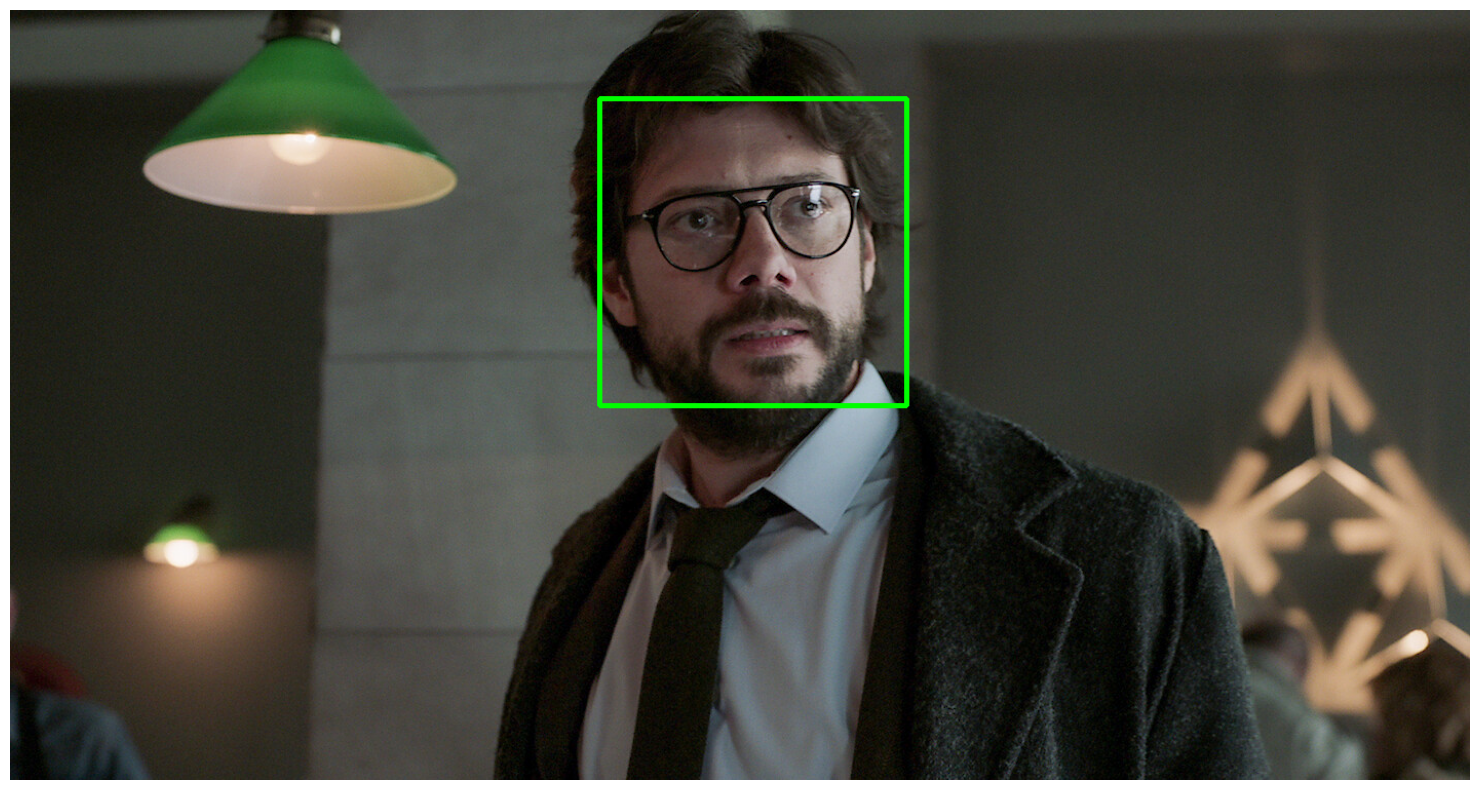

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Great!

The model has successfully detected the human face in this image and created a bounding box around it. 

# OpenCV for Face Detection in a Video

In [ ]:

import cv2

# Input video file path
input_video_path = 'videoplayback.mp4'  # Replace with your video file path

# Load the video
video_capture = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file.")
    exit()

# Load the Haar cascade for face detection
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

while True:
    result, frame = video_capture.read()  # Read each frame from the video
    if not result:
        break  # Exit the loop if no more frames are available

    # Convert frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_classifier.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 4)

    # Display the processed frame in a window
    cv2.imshow("Face Detection", frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
video_capture.release()
cv2.destroyAllWindows()

## Explanation:
#### Removed Output Video:
The cv2.VideoWriter step is removed, so the script only processes and displays the video in real-time without saving it.
#### Face Detection:
The Haar cascade is applied to each frame, and rectangles are drawn around detected faces.
#### Display Video:
Frames with detected faces are displayed in a window named "Face Detection".
The video stops when the end is reached or if the q key is pressed.


## **Real-Time Face Detection with OpenCV**

**NOTE: The following section does not work in DataCamp Workspace since it's not possible to access the webcam feed**

Now that we have successfully performed face detection on a static image with OpenCV, let’s see how to do the same on a live video stream. 

#### Step 1: Pre-Requisites

First, let’s go ahead and import the OpenCV library and load the Haar Cascade model just like we did in the previous section. You can skip this block of code if you already ran it previously:

In [12]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

#### Step 2: Access the Webcam

Now, we need to access our device’s camera to read a live stream of video data. This can be done with the following code:

In [13]:
video_capture = cv2.VideoCapture(0)

Notice that we have passed the parameter `0` to the VideoCapture() function. This tells OpenCV to use the default camera on our device. If you have multiple cameras attached to your device, you can change this parameter value accordingly.

#### Step 3: Identifying Faces in the Video Stream

Now, let’s create a function to detect faces in the video stream and draw a bounding box around them:

In [14]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

The `detect_bounding_box` function takes the video frame as input.

In this function, we are using the same codes as we did earlier to convert the frame into grayscale before performing face detection.

Then, we are also detecting the face in this image using the same parameter values for `scaleFactor`, `minNeighbors`, and `minSize` as we did previously.

Finally, we draw a green bounding box of thickness `4` around the frame.

#### Step 4: Creating a Loop for Real-Time Face Detection

Now, we need to create an indefinite while loop that will capture the video frame from our webcam and apply the face detection function to it:

In [ ]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()